In [3]:
import os
# assign directory
directory = 'lim25-imagenet-counterfactuals'
 
# iterate over files in
for filename in os.scandir(directory):
    if filename.is_file():
        print(filename.path)

In [8]:
import os
rootdir = 'lim25-imagenet-counterfactuals'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        print(subdir)
        print(os.path.join(subdir, file))

lim25-imagenet-counterfactuals/n02321529
lim25-imagenet-counterfactuals/n02321529/n02321529_10126.txt
lim25-imagenet-counterfactuals/n02321529
lim25-imagenet-counterfactuals/n02321529/n02321529_10133.txt
lim25-imagenet-counterfactuals/n02321529
lim25-imagenet-counterfactuals/n02321529/n02321529_10.txt
lim25-imagenet-counterfactuals/n02321529
lim25-imagenet-counterfactuals/n02321529/n02321529_10112.txt
lim25-imagenet-counterfactuals/n02321529
lim25-imagenet-counterfactuals/n02321529/n02321529_10067.txt
lim25-imagenet-counterfactuals/n02321529
lim25-imagenet-counterfactuals/n02321529/n02321529_1016.txt
lim25-imagenet-counterfactuals/n02321529
lim25-imagenet-counterfactuals/n02321529/n02321529_10101.txt
lim25-imagenet-counterfactuals/n02321529
lim25-imagenet-counterfactuals/n02321529/n02321529_10048.txt
lim25-imagenet-counterfactuals/n02321529
lim25-imagenet-counterfactuals/n02321529/n02321529_10157.txt
lim25-imagenet-counterfactuals/n02321529
lim25-imagenet-counterfactuals/n02321529/n023

In [11]:
import os
count = 0
for root, dirs, files in os.walk(rootdir):
    # for name in files:
    #     print(os.path.join(root, name))
    for name in dirs:
        
        # print(os.path.join(root, name))
        count += 1
        for name in files:
            print(os.path.join(root, name))

print(count)

1000


In [ ]:
gen_image_folder = pathlib.Path("imagegen/")
counterfactuals_folder = pathlib.Path("counterfactuals/")

for i, x in tqdm(enumerate(dataset)):
    # Retrieve information from dataset
    img_name = x['front']['name']
    img_dir = x['front']['videoName']
    # Where the generated results are saved
    gen_image_file = gen_image_folder.joinpath(img_dir).joinpath(img_name)
    
    counterfactual_file = counterfactuals_folder.joinpath(img_dir).joinpath(img_name.replace('jpg', 'txt'))

    if gen_image_file.exists():
        continue
    # If the result already exists, skip to next image
    
    with open(counterfactual_file, 'r') as f:
        counterfactual = (', ').join(f.readlines())
        img = tensor_to_image(x['front']['images'][0]/255)
        gen_image = generate_image(img, counterfactual)
        # print(counterfactual)
        gen_image_file.parent.mkdir(parents=True, exist_ok=True)
        gen_image.save(gen_image_file)
        # if i > 10:
        #     end = time.time()
        #     break
    

In [24]:
import os
import pathlib

gen_image_folder = pathlib.Path("imagegen/")
counterfactuals_folder = pathlib.Path("lim25-imagenet-counterfactuals/")
 
finish = 0
for dir_name in os.listdir(counterfactuals_folder):
    print(dir_name)
    count = 0
    for counterfactual_file in os.listdir(os.path.join(counterfactuals_folder, dir_name)):
        print(counterfactual_file)
        # with open(counterfactual_file, 'r') as f:
        #     counterfactual = (', ').join(f.readlines())
        #     print(counterfactual)
        if count == 25:
            break
        count += 1
    finish += 1
    if finish == 2:
        break
# print(count)

n02321529
n02321529_10126.txt
n02321529_10133.txt
n02321529_10.txt
n02321529_10112.txt
n02321529_10067.txt
n02321529_1016.txt
n02321529_10101.txt
n02321529_10048.txt
n02321529_10157.txt
n02321529_10118.txt
n02321529_10047.txt
.ipynb_checkpoints
n02321529_10089.txt
n02321529_10071.txt
n02321529_1.txt
n02321529_10039.txt
n02321529_10043.txt
n02321529_1015.txt
n02321529_10008.txt
n02321529_10021.txt
n02321529_10100.txt
n02321529_10167.txt
n02321529_10145.txt
n02321529_1010.txt
n02321529_10119.txt
n02321529_10082.txt
n12057211
n12057211_10248.txt
n12057211_10116.txt
n12057211_100.txt
n12057211_1005.txt
n12057211_10012.txt
n12057211_10097.txt
n12057211_10264.txt
n12057211_10044.txt
n12057211_1007.txt
n12057211_10004.txt
n12057211_10047.txt
n12057211_10169.txt
n12057211_10194.txt
n12057211_10170.txt
n12057211_10007.txt
n12057211_10010.txt
n12057211_10268.txt
n12057211_10053.txt
n12057211_10130.txt
n12057211_10245.txt
n12057211_10289.txt
n12057211_10127.txt
n12057211_10237.txt
n12057211_10108

In [33]:

import os
 
directory = 'lim25-imagenet-counterfactuals'
count = 0
last = ''
for dir_name in os.listdir(directory):
    # print(dir_name, count)
    last = dir_name
    count += 1
    if count == 501:
        break
print(count, last)

501 n02132136


In [ ]:
from torchvision.datasets import ImageNet
import pandas as pd
url = "https://gist.githubusercontent.com/aaronpolhamus/964a4411c0906315deb9f4a3723aac57/raw/aa66dd9dbf6b56649fa3fab83659b2acbf3cbfd1/map_clsloc.txt"
df = pd.read_csv(url, sep=" ", names=["nwid", "id", "class"]).set_index('nwid')
mapping = df.to_dict()

dataset = ImageNet(root="/data/")

In [ ]:
for i, elem in tqdm(enumerate(dataset)):
    img, y = elem
    img_name = dataset.imgs[i][0].split('/')
    img_file_name = img_name[-1]
    img_dir = img_name[-2]
    
    if img_dir != last_dir:
        print(img_dir, img_file_name, count)
        gen_image_file = gen_image_folder.joinpath(img_dir).joinpath(img_name)
        counterfactual_file = counterfactuals_folder.joinpath(img_dir).joinpath(img_name.replace('JPEG', 'txt'))
        if count > 24 :
            count = 0
            last_dir = img_dir
            
        else :
            if gen_image_file.exists():
                count += 1
                continue

            elif counterfactual_file.exist():
                with open(counterfactual_file, 'r') as f:
                    counterfactual = (', ').join(f.readlines())
                    gen_image = generate_image(img, counterfactual)
                    gen_image_file.parent.mkdir(parents=True, exist_ok=True)
                    gen_image.save(gen_image_file)
                    count += 1

In [3]:
from tqdm import tqdm
import pathlib
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from controlnet_aux import HEDdetector
from diffusers.utils import load_image
import torch
from torchvision.datasets import ImageNet

dataset = ImageNet(root="/home/jovyan/work/dataset/ILSVRC2012")
gen_image_folder = pathlib.Path("imagenet-gen/")
counterfactuals_folder = pathlib.Path("lim25-imagenet-counterfactuals/")


2023-11-02 20:49:00.649550: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-02 20:49:01.557583: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-11-02 20:49:01.557708: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-11-02 20:49:01.557725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
/opt/conda/lib/python3.10/site-packages/controlnet_aux/mediapip

In [4]:
cuda1 = torch.device('cuda:1')

In [5]:

hed = HEDdetector.from_pretrained("lllyasviel/Annotators")
generator = torch.Generator(cuda1).manual_seed(1024)
controlnet = ControlNetModel.from_pretrained(
    "fusing/stable-diffusion-v1-5-controlnet-hed", torch_dtype=torch.float16
)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16
)

pipe = pipe.to(cuda1)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
# pipe.enable_xformers_memory_efficient_attention()

def generate_image(image, prompt):
    image_hed = hed(image)
    negative_prompt = 'low quality, painting, cartoon, greyscale image, (saturated color: 1.9), bright colors'
    image_out = pipe(prompt, 
                     image_hed,
                     num_inference_steps=5, 
                     negative_prompt=negative_prompt, 
                     generator = generator
                    ).images[0]

    return image_out 


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


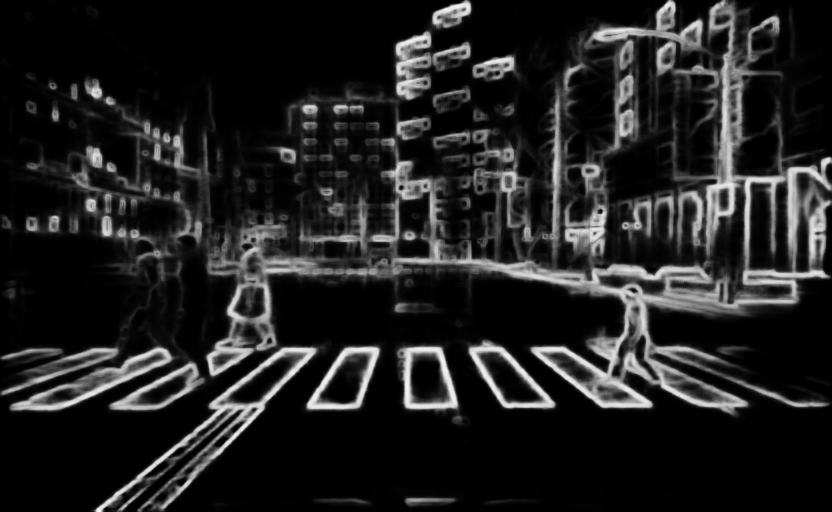

In [6]:
image = load_image('../../dataset/shift/discrete/images/train/front/img/0003-17fb/00000190_img_front.jpg')

# width, height = image.size
# image = image.resize((width//2, height//2))

image = hed(image)
image

In [7]:
for i in range(5):
    image_out = generate_image(image, 'sunny')

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [34]:
count = 0
last_dir = " "
for i, elem in tqdm(enumerate(dataset)):
    img, y = elem
    img_name = dataset.imgs[i][0].split('/')
    img_file_name = img_name[-1]
    img_dir = img_name[-2]
    
    if img_dir != last_dir:
        print(img_dir, img_file_name, count)
        gen_image_file = gen_image_folder.joinpath(img_dir).joinpath(img_file_name)
        counterfactual_file = counterfactuals_folder.joinpath(img_dir).joinpath(img_file_name.replace('JPEG', 'txt'))
        if count > 24 :
            count = 0
            last_dir = img_dir
            
        else :
            if gen_image_file.exists():
                count += 1
                continue

            elif counterfactual_file.exists():
                with open(counterfactual_file, 'r') as f:
                    counterfactual = (', ').join(f.readlines())
                    for gen in range(5):
                        # gen_image = generate_image(img, counterfactual)
                        gen_image_file.parent.mkdir(parents=True, exist_ok=True)
                        print(gen)
                        # gen_image.save(f"{gen_image_file}_{gen}")
                    count += 1

72it [00:00, 364.36it/s]

n01440764 n01440764_10026.JPEG 0
0
1
2
3
4
n01440764 n01440764_10027.JPEG 1
0
1
2
3
4
n01440764 n01440764_10029.JPEG 2
0
1
2
3
4
n01440764 n01440764_10040.JPEG 3
0
1
2
3
4
n01440764 n01440764_10042.JPEG 4
0
1
2
3
4
n01440764 n01440764_10043.JPEG 5
0
1
2
3
4
n01440764 n01440764_10048.JPEG 6
0
1
2
3
4
n01440764 n01440764_10066.JPEG 7
0
1
2
3
4
n01440764 n01440764_10074.JPEG 8
0
1
2
3
4
n01440764 n01440764_1009.JPEG 9
0
1
2
3
4
n01440764 n01440764_10095.JPEG 10
0
1
2
3
4
n01440764 n01440764_10108.JPEG 11
0
1
2
3
4
n01440764 n01440764_10110.JPEG 12
0
1
2
3
4
n01440764 n01440764_10120.JPEG 13
0
1
2
3
4
n01440764 n01440764_10124.JPEG 14
0
1
2
3
4
n01440764 n01440764_10150.JPEG 15
0
1
2
3
4
n01440764 n01440764_10159.JPEG 16
0
1
2
3
4
n01440764 n01440764_10162.JPEG 17
0
1
2
3
4
n01440764 n01440764_10183.JPEG 18
0
1
2
3
4
n01440764 n01440764_10194.JPEG 19
0
1
2
3
4
n01440764 n01440764_10211.JPEG 20
0
1
2
3
4
n01440764 n01440764_10218.JPEG 21
0
1
2
3
4
n01440764 n01440764_10227.JPEG 22
0
1
2
3
4

1002it [00:03, 275.72it/s]


KeyboardInterrupt: 

In [32]:
print(len(os.listdir('lim25-imagenet-counterfactuals')))

1000


In [38]:
n = True
for i in range(10):
    if i == 5:
        n = False
    if n == False:
        print(i)
        break

5


In [40]:
import sys
sys.version_info

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)

In [1]:
import torch
# torch.cuda.is_available()
print(torch.__version__)

2.0.1+cu118


In [3]:
torch.cuda.device_count()

2

In [8]:
print(torch.version)

<module 'torch.version' from '/opt/conda/lib/python3.10/site-packages/torch/version.py'>


In [5]:
with open('cp1.txt', 'r') as f:
    check_point = f.read()

print(check_point)

n02108000


In [2]:
# with open('cp1.txt', 'w') as f:
#     f.write('hhh')

In [6]:
if 'n02108000' == check_point:
    print('same')

else:
    print('no')

same
